# HOUSING IN NAIROBI

## WEB SCRAPPING PROPERTY24

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [ ]:
from bs4 import BeautifulSoup 
pd.set_option('display.max_colwidth', 500)
import time
import requests
import random

In [ ]:
# List of title, price and address/location
title = []

price = []

address = []

# List of URLs
urls = [f"https://www.property24.co.ke/property-to-rent-in-nairobi-c1890?page={i}/" for i in range(1,1001)]

# List for Randomizing our request rate
rate = [i/10 for i in range(10)]

# Iterating through the URLS
for url in urls:
    
    # Accessing the Webpage
    page = requests.get(url)
    
    # Getting the webpage's content in pure html
    soup = BeautifulSoup(page.content)

    # Adding the title, price and address to their lists
    price.extend([i.text.strip() for i in soup.find_all(class_='sc_listingTilePrice primaryColor')])

    title.extend([i.text.strip() for i in soup.find_all(class_='sc_listingTileArea')])
    
    address.extend([i.text.strip() for i in soup.find_all(class_='sc_listingTileAddress primaryColor')])

    # Checking to see if we hit our required number of titles then breaking the loop
    if len(title) >= 5001:
        break
        
    # Randomizing our request rate    
    time.sleep(random.choice(rate))

In [ ]:
# Creating a DataFrame to store our newly scraped information
df = pd.DataFrame()

# Storing the quotes and authors in their respective columns
df['title'] = title
df['price'] = price
df['address'] = address

# Print df
print(df.shape)
print(df.info())
df.head()

## DATA CLEANING

In [ ]:
# remove leading and trailing Spaces, "KSh" and "Per Month", "Nairobi"
df = (df.replace("KSh", "", regex=True)
      .replace("Per Month", "", regex=True)
      .replace(", Nairobi", "", regex=True)
      .replace("\n\r\n ", "", regex=True)
      .replace("\r\n \n\r\n ", "", regex=True)
      .replace("\r\n \n", "", regex=True)
      .replace("\r\n ", "", regex=True)
      .replace("\n", "", regex=True)
                    )
# remove unwanted spaces and dtype
df["price"] = df["price"].str.replace(" ", "", regex=True).astype(float)

# create column for home size named "no_bedrooms"
df["no_bedrooms"] = df["title"].str.replace(r"\D", "", regex=True)

# drop null values
df.dropna(inplace = True)

# print df
print(df.shape)
print(df.info())
df.head()

In [ ]:
# save DataFrame, df
df.to_csv("property_to_rent_in_nairobi.csv")

## EXPLANATORY DATA ANALYSIS

In [2]:
# read in df
df = pd.read_csv("property_to_rent_in_nairobi.csv", index_col="Unnamed: 0")

# drop null values
df.dropna(inplace = True)

print(df.shape)
print(df.info())
df.head()

(4513, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4513 entries, 0 to 5018
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4513 non-null   object 
 1   price        4513 non-null   float64
 2   address      4513 non-null   object 
 3   no_bedrooms  4513 non-null   float64
dtypes: float64(2), object(2)
memory usage: 176.3+ KB
None


,title,price,address,no_bedrooms
0,2 Bedroom Apartment / Flat to Rent in Langata,30000.0,Langata,2.0
1,2 Bedroom Apartment / Flat to Rent in Lower Ka...,30000.0,Lower Kabete,2.0
3,2 Bedroom Apartment / Flat to Rent in Lower Ka...,30000.0,Lower Kabete,2.0
4,2 Bedroom Apartment / Flat to Rent in Riverside,160000.0,"Riverside Dr Nairobi, Riverside",2.0
5,3 Bedroom Apartment / Flat to Rent in Westlands,105000.0,Westlands,3.0


In [3]:
df["address"].value_counts()

Kilimani                               996
Riverside Dr Nairobi, Riverside        500
Lavington                              498
Westlands                              256
Riverside drive, Riverside             255
Nandi Rd Karen, Karen                  255
Riverside                              253
Lower Kabete                           252
Ndemi Rd Kilimani, Kileleshwa          252
Kileleshwa, Kileleshwa                 252
Ruaka Rd Kitisuru, Runda               250
Langata                                248
Brookside drive westland, Westlands    246
Name: address, dtype: int64

In [4]:
replacement_dict = {
    "Riverside Dr Nairobi, Riverside": "Riverside",
    "Riverside drive, Riverside": "Riverside",
    "Nandi Rd Karen, Karen": "Karen",
    "Ndemi Rd Kilimani, Kileleshwa": "Kileleshwa",
    "Kileleshwa, Kileleshwa": "Kileleshwa",
    "Ruaka Rd Kitisuru, Runda": "Runda",
    "Brookside drive westland, Westlands": "Westlands"
}

df["address"] = df["address"].replace(replacement_dict, regex=True)

### CATEGORICAL DATA: ADDRESS

Below are the most prevalent estates in our dataset:

In [5]:
df["address"].value_counts()

Riverside       1008
Kilimani         996
Kileleshwa       504
Westlands        502
Lavington        498
Karen            255
Lower Kabete     252
Runda            250
Langata          248
Name: address, dtype: int64

### NUMERICAL DATA: PRICE

We have a sense for where the residential houses in our dataset are located, but how much do they cost on a monthly basis? How big are they? 

In [6]:
df["price"].describe()

count      4513.000000
mean     174931.309550
std      105334.529896
min       30000.000000
25%      100000.000000
50%      150000.000000
75%      250000.000000
max      400000.000000
Name: price, dtype: float64

Notice that the mean is slightly higher than the median (50% quantile), and the standard devation is lower than the mean which means the monthly rent price is more concentrated around the mean. 

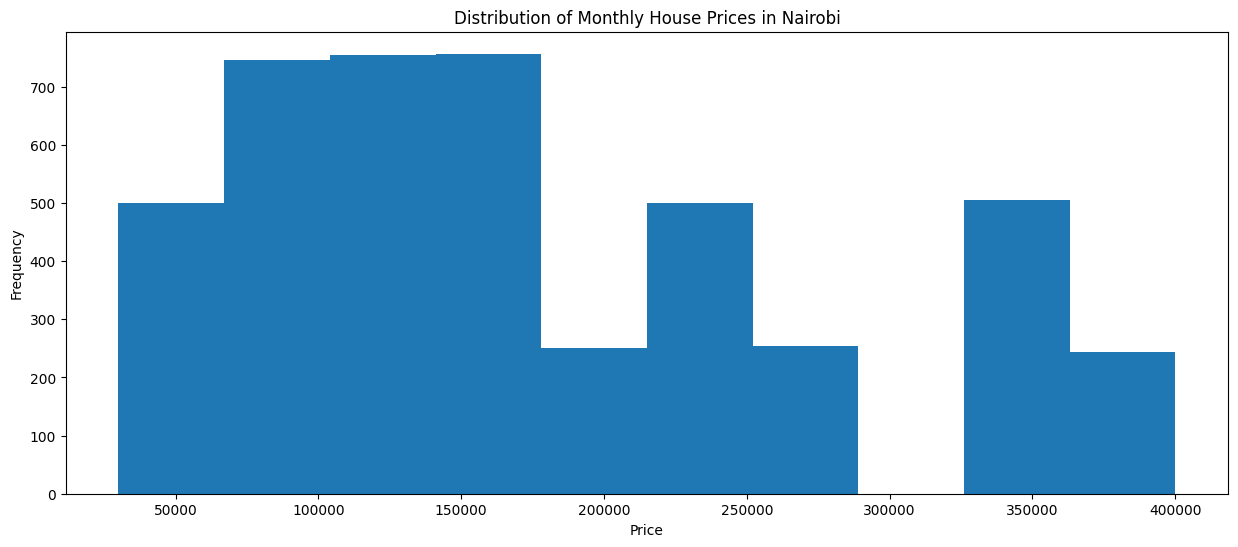

In [7]:
# A histogram on the monthly rental prices
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the data
plt.hist(df["price"])

# Add labels and title
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Monthly House Prices in Nairobi")

# Display the plot
plt.show()

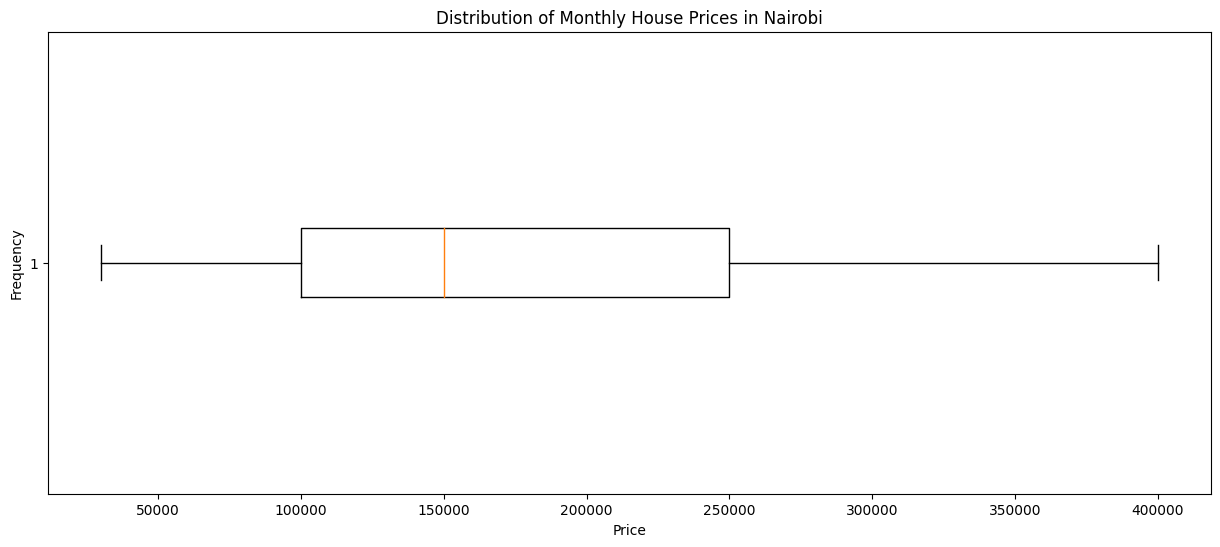

In [8]:
# A box plot on the monthly rental prices
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the data
plt.boxplot(df["price"], vert=False)

# Add labels and title
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Monthly House Prices in Nairobi")

# Display the plot
plt.show()


### LOCATION OR SIZE

**Which locations have the most expensive houses to rent?**

Do housing prices vary by state? If so, which are the most expensive estates for renting a house? During our explanatory data analysis, we used descriptive statistics like mean and median to get an idea of the typical house price in Nairobi. Now, we need to break that calculation down by location and visualise the results.

In [9]:
mean_price_by_address = df.groupby("address")["price"].mean().sort_values(ascending=False)
mean_price_by_address

address
Karen           350000.000000
Lavington       336244.979920
Riverside       222222.222222
Runda           200000.000000
Kileleshwa      130000.000000
Kilimani        127274.096386
Westlands       102549.800797
Langata          30000.000000
Lower Kabete     30000.000000
Name: price, dtype: float64

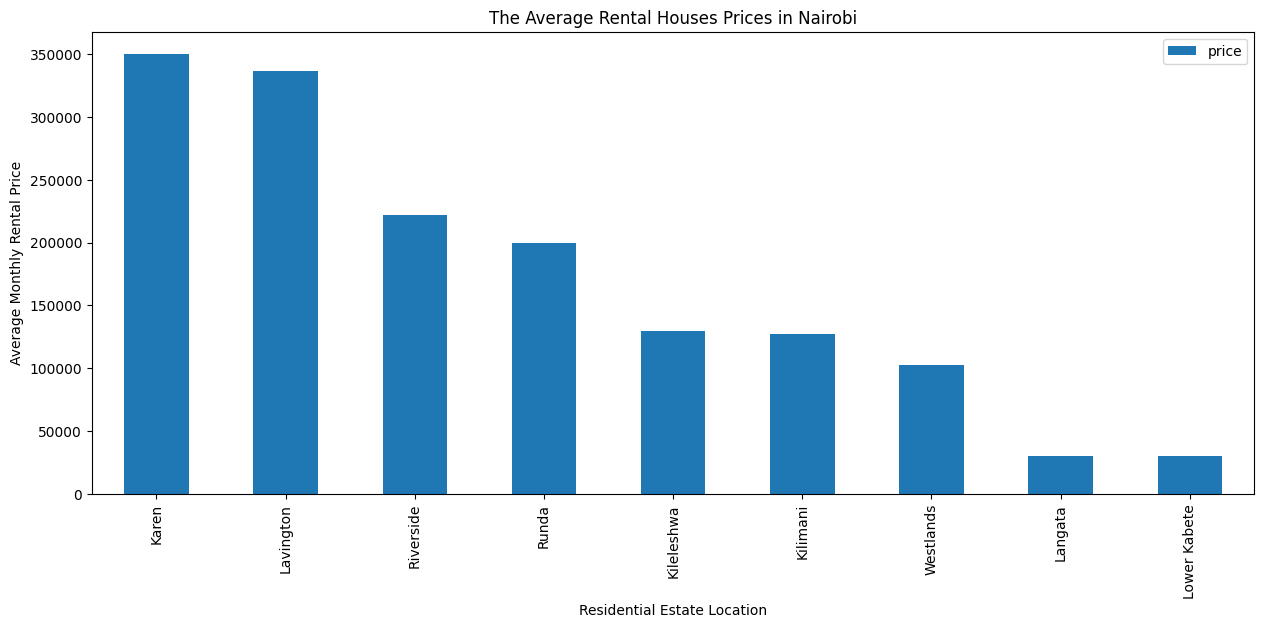

In [10]:
# A bar chart on the average monthly rental price in different locations
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the data
mean_price_by_address.plot(kind="bar")

# Add labels and title
ax.set_xlabel("Residential Estate Location")
ax.set_ylabel("Average Monthly Rental Price")
ax.set_title("The Average Rental Houses Prices in Nairobi")

# Add legend
ax.legend()

# Display the plot
plt.show()

Now we see that Nandi Road, Karen is by far the most expensive residential estate. Additionally, many of the top 10 estates are the most expensive residential estate in the real estate market. So it looks like this bar chart is a more accurate reflection of residential real estate markets.  

**Is there a relationship between home size (number of bedrooms) and price?**

In [11]:
df.groupby("no_bedrooms")["price"].mean().sort_values(ascending=False)

no_bedrooms
5.0    340903.054449
4.0    174900.398406
1.0    150000.000000
3.0    148991.192954
2.0    125783.922463
Name: price, dtype: float64

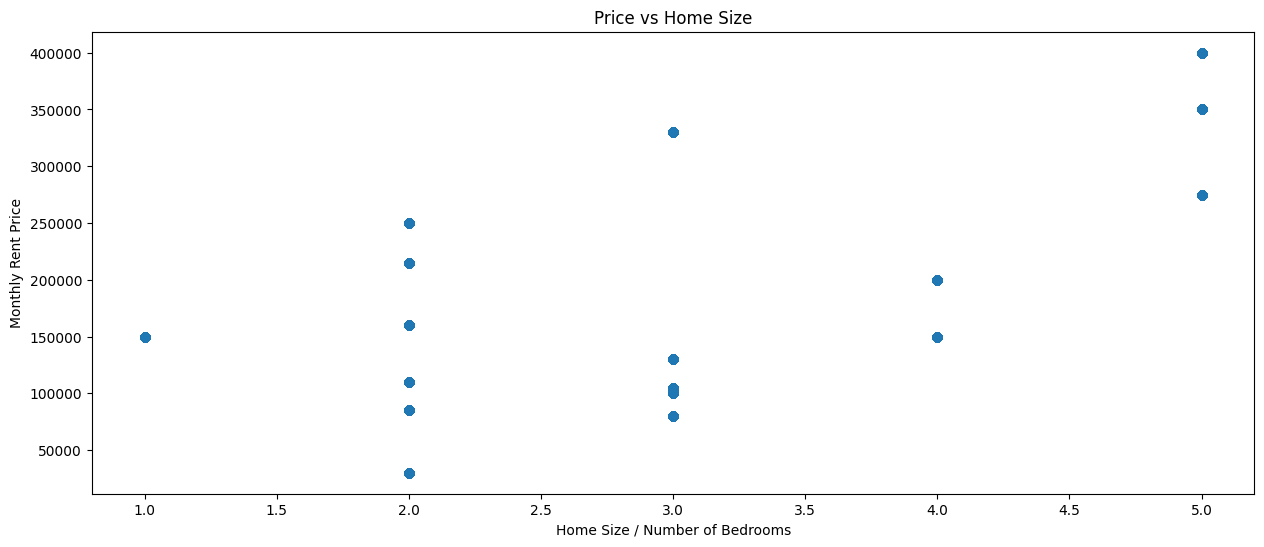

In [12]:
# A scatter plot on the relationship of home size and prices
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the data
plt.scatter(x = df["no_bedrooms"], y = df["price"])

# Add labels and title
ax.set_xlabel("Home Size / Number of Bedrooms")
ax.set_ylabel("Monthly Rent Price")
ax.set_title("Price vs Home Size")

# Display the plot
plt.show()


There is definitely a positive correlation, in other words, the more bedrooms in a residential house, the higher the monthly price. 

In [13]:
correlation = df["no_bedrooms"].corr(df["price"])
correlation

0.6224986995340767

The correlation coefficient is 0.62, so there's a moderate positive relationship between home size and price in Nairobi. 

## CONCLUSION

The relationship between home size and price does hold true in the country's biggest and most economically powerful urban center, Nairobi. 